### Apellidos y Nombres:

Lettere Dragosavljevich Mathias Giuseppe

### Fecha:

07-09-2023

# **Visualización en Spark**


## Google Colab Setup

If you are going to use Google Colab instead of a Spark Cluster, you will need to run the following code to install Apache Spark.

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
#If the following links don't work, you will have to update them with the last versions of Apache Spark
!wget -q https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

## Setup


In [4]:
# Installing required packages
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=24f6ee72d06b79678e127c5063d70b3dd6a1e1ece6de16179a834302b38c2e26
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [5]:
import findspark
findspark.init()

In [6]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

#### Creating the spark session and context


In [7]:
# Creating a spark context class
sc = SparkContext()

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

#### Initialize Spark session



In [8]:
spark

## Load the dataset into your Colab directory from your local system


In [9]:
from google.colab import files
files.upload()

Saving washing.parquet to washing.parquet


{'washing.parquet': b'PAR1\x15\x00\x15\xde\x85\t\x15\x80\x91\x02,\x15\x94 \x15\x00\x15\x06\x15\x08\x1c\x18 e25acc0758bc7bd9f561f6d1e2bca9c2\x18 0d86485d0f88d1f9d60bd193a4306793\x16\x00\x00\x00\x00\xef\xc2\x04\xa8\x03\x00\x00\x00\x94 \x01 \x00\x00\x000d86485d0f88d1f9d60bd193a4306793\x82$\x00\x08ee1~$\x00\x0c7322~$\x00\x0c80fc\x82$\x00\x0470\x82l\x00\x0c9533~H\x00\x0ca3c5~$\x00\x0cd357\x82$\x00\x04c5\x82\x90\x00\x0ced0a~H\x00\x08f27~$\x00\x0c1091~ \x01\x1013860zl\x00\x0c1435\x82H\x00\x08455\x82\x90\x00\x0846f~\xd4\x01\x1014e38~\x90\x00\x0c87d9\x82$\x00\x0883b~$\x00\x08abf\x82\xb4\x00\x08bf2~\x1c\x02\x0c1e36~l\x00\x0c213d~\x1c\x02\x0c2334~\xfc\x00\x1024f5fz\xd8\x00\x0c26b6~d\x02\x0c27dd\x82l\x00\x0cbd3d~l\x00\x08d78~\xd4\x01\x0c2dd5\x82l\x00\x0ce694~l\x00\x08f74~\xf8\x01\x0c2fdd~\xac\x02\x0432\x86h\x01\x0c337b~h\x01\x0c3468\x82l\x00\x086ac~`\x03\x0c378f~\x1c\x02\x10379dez \x01\x0c39ee~\xac\x02\x0c3bc1~D\x01\x083d1\x82\x80\x04\x0c3dbb\x82\xb4\x00\x08ff7~$\x00\x0c402e~\xd8\x00\x0c4226~h\x01

## Dataframe de Spark a partir del archivo adjunto

In [11]:
dfsWashing = spark.read.parquet("washing.parquet", header=True, inferSchema=True)
print(dfsWashing.printSchema())

root
 |-- _id: string (nullable = true)
 |-- _rev: string (nullable = true)
 |-- count: long (nullable = true)
 |-- flowrate: long (nullable = true)
 |-- fluidlevel: string (nullable = true)
 |-- frequency: long (nullable = true)
 |-- hardness: long (nullable = true)
 |-- speed: long (nullable = true)
 |-- temperature: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- voltage: long (nullable = true)

None


## Reemplace todos los valores null de las variables por la media de la respectiva variable




In [17]:
from pyspark.sql.functions import avg
import matplotlib.pyplot as plt


In [22]:
avgFlow = dfsWashing.agg(avg('flowrate')).collect()[0][0]
avgFreq = dfsWashing.agg(avg('frequency')).collect()[0][0]
avgHard = dfsWashing.agg(avg('hardness')).collect()[0][0]
avgSpeed = dfsWashing.agg(avg('speed')).collect()[0][0]
avgTemp = dfsWashing.agg(avg('temperature')).collect()[0][0]
avgTS = dfsWashing.agg(avg('ts')).collect()[0][0]
avgVolt = dfsWashing.agg(avg('voltage')).collect()[0][0]

dfsClean = dfsWashing.fillna({'flowrate': avgFlow, 'fluidlevel': "acceptable", 'frequency': avgFreq, 'hardness': avgHard, 'speed': avgSpeed, 'temperature': avgTemp, 'ts': avgTS, 'voltage': avgVolt})

In [23]:
dfsClean.createOrReplaceTempView("Washing")
spark.sql("SELECT * FROM Washing").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|       70|      77| 1059|        100|1547808723923|    230|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|      11|acceptable|       70|      82| 1046|         90|1547808729917|    230|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|      11|acceptable|       71|      82| 1059|         90|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|       70|      75| 1059|         86|1547808738999|    230|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|      11|acceptable|       75|      82| 1059|   

In [33]:
graphDataVolt = spark.sql("select voltage from washing where voltage is not null")
graphDataVolt_array = graphDataVolt.rdd.map(lambda x: x.voltage).sample(False, 0.25).collect()

graphDataVolt_array[:15]

[236, 230, 230, 230, 236, 233, 230, 230, 230, 220, 239, 230, 230, 230, 230]

In [30]:
graphDataTemp = spark.sql("select temperature from washing where temperature is not null")
graphDataTemp_array = graphDataTemp.rdd.map(lambda x: x.temperature).sample(False, 0.25).collect()

graphDataTemp_array[:15]

[90, 84, 96, 87, 90, 96, 89, 86, 89, 90, 99, 94, 99, 90, 83]

## Cree un boxplot para el voltaje y temperatura con el 25% de muestra de los datos. Agregue título al gráfico y los ejes.


Text(0, 0.5, 'Voltaje')

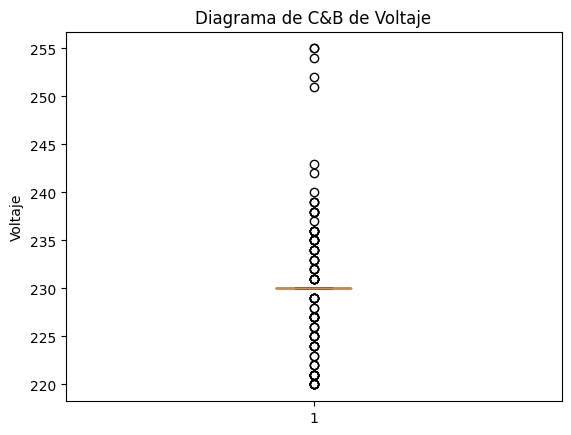

In [62]:
plt.boxplot(graphDataVolt_array)
plt.title("Diagrama de C&B de Voltaje")
plt.ylabel("Voltaje")

Text(0, 0.5, 'Temperatura')

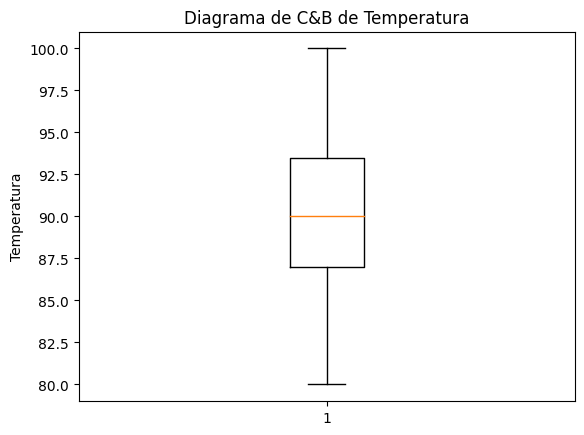

In [63]:
plt.boxplot(graphDataTemp_array)
plt.title("Diagrama de C&B de Temperatura")
plt.ylabel("Temperatura")

## Cree un run chart para el voltaje y la temperatura con el 25% de muestra de los datos . Agregue título al gráfico y los ejes.


In [41]:
combineVoltTemp = spark.sql("select voltage, temperature from washing where voltage is not null order by temperature asc")
combineVoltTemp_rdd = combineVoltTemp.rdd.sample(False, 0.25).map(lambda row : (row.temperature, row.voltage))

dataArrayTemp = combineVoltTemp_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
dataArrayV = combineVoltTemp_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()

Text(0, 0.5, 'Voltaje')

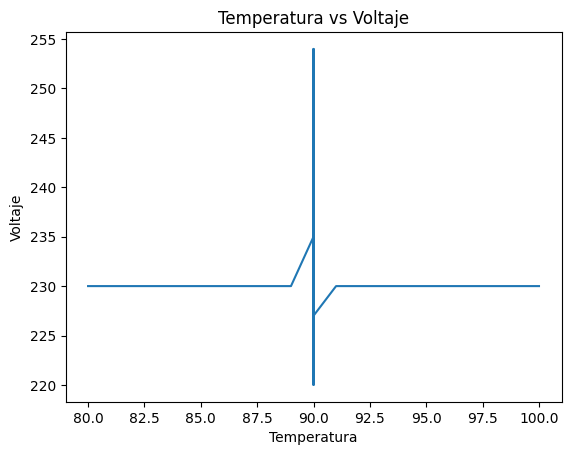

In [64]:
plt.plot(dataArrayTemp, dataArrayV)
plt.title("Temperatura vs Voltaje")
plt.xlabel("Temperatura")
plt.ylabel("Voltaje")

## Cree un scatter plot de voltaje vs temperatura con el 25% de muestra de los datos. Agregue título al gráfico y los ejes.



In [69]:
tempTable = spark.sql("""
select voltage, temperature from washing
  where voltage is not null and
  temperature is not null
""")

res_rdd = tempTable.rdd.sample(False, 0.25).map(lambda row: (row.voltage, row.temperature))
res_rdd_volt = res_rdd.map(lambda x: x[0]).collect()
res_rdd_temp = res_rdd.map( lambda y: y[1]).collect()



Text(0.5, 0, 'Voltaje')

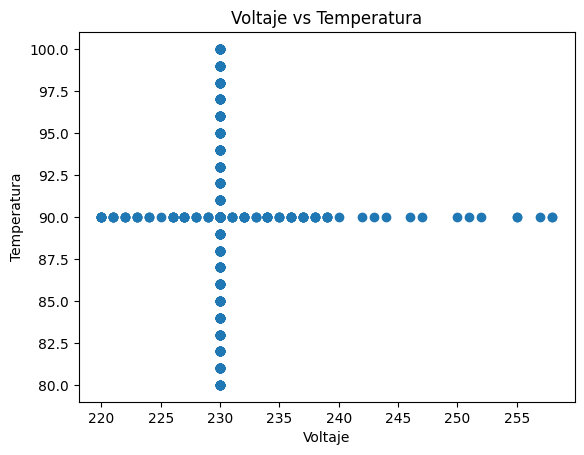

In [70]:
plt.scatter(res_rdd_volt, res_rdd_temp)
plt.title("Voltaje vs Temperatura")
plt.ylabel("Temperatura")
plt.xlabel("Voltaje")

## Cree un histograma de la temperatura con el 25% de muestra de los datos. Agregue título al gráfico y los ejes.


Text(0, 0.5, 'Temperatura')

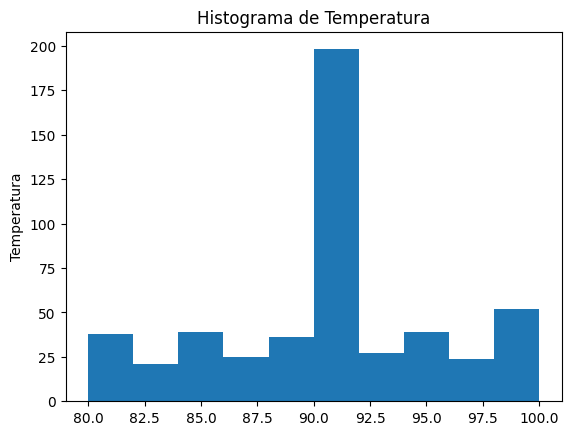

In [68]:
plt.hist(res_rdd_temp)
plt.title("Histograma de Temperatura")
plt.ylabel("Temperatura")

## Cree un scatter plot (2D) de hardness vs temperature con el 25% de la muestra de los datos. Agregue título al gráfico y los ejes.


In [73]:
tempTable = spark.sql("""
select hardness, temperature from washing
  where hardness is not null and
  temperature is not null
""")

res_rdd = tempTable.rdd.sample(False, 0.25).map(lambda row: (row.hardness, row.temperature))
res_rdd_hard = res_rdd.map(lambda x: x[0]).collect()
res_rdd_temp = res_rdd.map( lambda y: y[1]).collect()

Text(0.5, 0, 'Dureza')

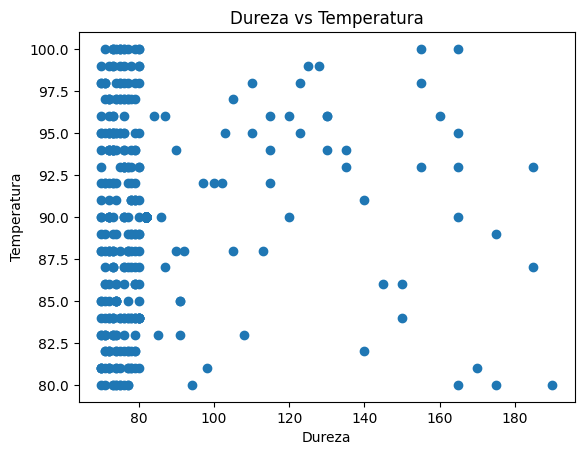

In [72]:
plt.scatter(res_rdd_hard, res_rdd_temp)
plt.title("Dureza vs Temperatura")
plt.ylabel("Temperatura")
plt.xlabel("Dureza")

## Cree un 3D scatter plot con las dimensiones de hardness, temperature, y flowrate. Use una muestra del 25% de los datos. Agregue título al gráfico y los ejes.


In [75]:
tempTable = spark.sql("""
select hardness, temperature, flowrate from washing
  where hardness is not null and
  temperature is not null and
  flowrate is not null
""")

res_rdd = tempTable.rdd.sample(False, 0.25).map(lambda row: (row.hardness, row.temperature, row.flowrate))
res_rdd_hard = res_rdd.map(lambda x: x[0]).collect()
res_rdd_temp = res_rdd.map( lambda y: y[1]).collect()
res_rdd_flow = res_rdd.map( lambda z: z[2]).collect()

Text(0.5, 0, 'Flowrate')

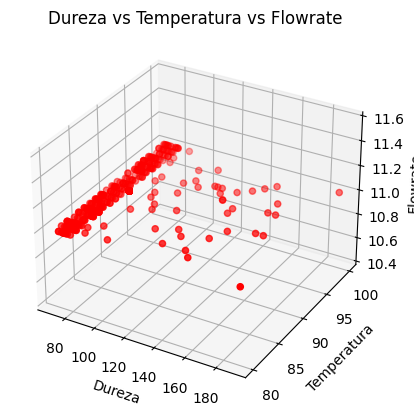

In [78]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(res_rdd_hard, res_rdd_temp, res_rdd_flow, c='r', marker='o')
ax.set_title('Dureza vs Temperatura vs Flowrate')
ax.set_xlabel('Dureza')
ax.set_ylabel('Temperatura')
ax.set_zlabel('Flowrate')